In [1]:
import pandas as pd
import seaborn as sns
from datetime import date, datetime
import math
import matplotlib.pyplot as plt

In [2]:
demand = pd.read_csv('/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/capacity/demand.csv')
solar = pd.read_csv('/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/capacity/solar.csv')
offshore = pd.read_csv('/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/capacity/offshore.csv')
onshore = pd.read_csv('/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/capacity/onshore.csv')

demand.head()

,Unnamed: 0,time,value,hour,month,dayofweek,dayofmonth,year,value-1,value-2,value-3,value-24,value-25,value-26,value-27,value-168,value-169,value-170,value-171,holiday
0,171,2011-06-03 19:00:00,33880.250000,19,6,4,3,2011,35690.250000,36978.333333,38135.416667,35907.000000,37420.250000,38815.583333,39945.250000,34741.166667,36146.333333,37497.583333,38649.090909,False
1,172,2011-06-03 20:00:00,33181.000000,20,6,4,3,2011,33880.250000,35690.250000,36978.333333,35405.833333,35907.000000,37420.250000,38815.583333,34722.666667,34741.166667,36146.333333,37497.583333,False
2,173,2011-06-03 21:00:00,33132.083333,21,6,4,3,2011,33181.000000,33880.250000,35690.250000,35090.250000,35405.833333,35907.000000,37420.250000,33434.833333,34722.666667,34741.166667,36146.333333,False
3,174,2011-06-03 22:00:00,30041.916667,22,6,4,3,2011,33132.083333,33181.000000,33880.250000,31313.083333,35090.250000,35405.833333,35907.000000,29708.750000,33434.833333,34722.666667,34741.166667,False
4,175,2011-06-03 23:00:00,27883.666667,23,6,4,3,2011,30041.916667,33132.083333,33181.000000,29467.250000,31313.083333,35090.250000,35405.833333,27410.000000,29708.750000,33434.833333,34722.666667,False


In [3]:
demand.time = pd.to_datetime(demand.time)

In [4]:
Y = 2000 # dummy leap year to allow input X-02-29 (leap day)
# seasons = [('winter', (date(Y,  1,  1),  date(Y,  3, 19))),
#            ('spring', (date(Y,  3, 20),  date(Y,  6, 20))),
#            ('summer', (date(Y,  6, 21),  date(Y,  9, 22))),
#            ('autumn', (date(Y,  9, 23),  date(Y, 12, 20))),
#            ('winter', (date(Y, 12, 21),  date(Y, 12, 31)))]

seasons = [('1', (date(Y,  4,  1),  date(Y,  4, 26))),
           ('2', (date(Y,  4, 27),  date(Y,  8, 16))),
           ('3', (date(Y,  8, 17),  date(Y,  9, 20))),
           ('4', (date(Y,  9, 21),  date(Y, 10, 25))),
           ('5', (date(Y,  10, 26),  date(Y, 12, 31))),
           ('6', (date(Y, 1, 1),  date(Y, 1, 24))),
           ('7', (date(Y, 1, 25),  date(Y, 3, 31)))]

def get_season(now):
    if isinstance(now, datetime):
        now = now.date()
    now = now.replace(year=Y)
    return next(season for season, (start, end) in seasons
                if start <= now <= end)

print(get_season(date.today()))

4


In [5]:
demand['season'] = demand.time.map(lambda x: get_season(x))
demand

,Unnamed: 0,time,value,hour,month,dayofweek,dayofmonth,year,value-1,value-2,...,value-24,value-25,value-26,value-27,value-168,value-169,value-170,value-171,holiday,season
0,171,2011-06-03 19:00:00,33880.250000,19,6,4,3,2011,35690.250000,36978.333333,...,35907.000000,37420.250000,38815.583333,39945.250000,34741.166667,36146.333333,37497.583333,38649.090909,False,2
1,172,2011-06-03 20:00:00,33181.000000,20,6,4,3,2011,33880.250000,35690.250000,...,35405.833333,35907.000000,37420.250000,38815.583333,34722.666667,34741.166667,36146.333333,37497.583333,False,2
2,173,2011-06-03 21:00:00,33132.083333,21,6,4,3,2011,33181.000000,33880.250000,...,35090.250000,35405.833333,35907.000000,37420.250000,33434.833333,34722.666667,34741.166667,36146.333333,False,2
3,174,2011-06-03 22:00:00,30041.916667,22,6,4,3,2011,33132.083333,33181.000000,...,31313.083333,35090.250000,35405.833333,35907.000000,29708.750000,33434.833333,34722.666667,34741.166667,False,2
4,175,2011-06-03 23:00:00,27883.666667,23,6,4,3,2011,30041.916667,33132.083333,...,29467.250000,31313.083333,35090.250000,35405.833333,27410.000000,29708.750000,33434.833333,34722.666667,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65908,66502,2018-12-27 14:00:00,36784.750000,14,12,3,27,2018,36682.000000,36814.166667,...,32605.500000,32773.250000,32548.916667,31786.916667,39188.750000,38287.500000,38239.750000,38465.000000,False,5
65909,66503,2018-12-27 15:00:00,37835.750000,15,12,3,27,2018,36784.750000,36682.000000,...,33133.333333,32605.500000,32773.250000,32548.916667,40193.583333,39188.750000,38287.500000,38239.750000,False,5
65910,66504,2018-12-27 16:00:00,40393.583333,16,12,3,27,2018,37835.750000,36784.750000,...,35031.833333,33133.333333,32605.500000,32773.250000,42569.583333,40193.583333,39188.750000,38287.500000,False,5
65911,66505,2018-12-27 17:00:00,42150.583333,17,12,3,27,2018,40393.583333,37835.750000,...,36038.833333,35031.833333,33133.333333,32605.500000,44252.916667,42569.583333,40193.583333,39188.750000,False,5


In [6]:
def working_day_check(date):
    if date.holiday == True or date.dayofweek == 6:
        return "non_working_day"
    elif date.dayofweek in [0,1,2,3,4,5]:
        return "working_day"
    else:
        print("error")
    

demand['working_day'] = demand.apply(lambda x: working_day_check(x), axis=1)
demand

,Unnamed: 0,time,value,hour,month,dayofweek,dayofmonth,year,value-1,value-2,...,value-25,value-26,value-27,value-168,value-169,value-170,value-171,holiday,season,working_day
0,171,2011-06-03 19:00:00,33880.250000,19,6,4,3,2011,35690.250000,36978.333333,...,37420.250000,38815.583333,39945.250000,34741.166667,36146.333333,37497.583333,38649.090909,False,2,working_day
1,172,2011-06-03 20:00:00,33181.000000,20,6,4,3,2011,33880.250000,35690.250000,...,35907.000000,37420.250000,38815.583333,34722.666667,34741.166667,36146.333333,37497.583333,False,2,working_day
2,173,2011-06-03 21:00:00,33132.083333,21,6,4,3,2011,33181.000000,33880.250000,...,35405.833333,35907.000000,37420.250000,33434.833333,34722.666667,34741.166667,36146.333333,False,2,working_day
3,174,2011-06-03 22:00:00,30041.916667,22,6,4,3,2011,33132.083333,33181.000000,...,35090.250000,35405.833333,35907.000000,29708.750000,33434.833333,34722.666667,34741.166667,False,2,working_day
4,175,2011-06-03 23:00:00,27883.666667,23,6,4,3,2011,30041.916667,33132.083333,...,31313.083333,35090.250000,35405.833333,27410.000000,29708.750000,33434.833333,34722.666667,False,2,working_day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65908,66502,2018-12-27 14:00:00,36784.750000,14,12,3,27,2018,36682.000000,36814.166667,...,32773.250000,32548.916667,31786.916667,39188.750000,38287.500000,38239.750000,38465.000000,False,5,working_day
65909,66503,2018-12-27 15:00:00,37835.750000,15,12,3,27,2018,36784.750000,36682.000000,...,32605.500000,32773.250000,32548.916667,40193.583333,39188.750000,38287.500000,38239.750000,False,5,working_day
65910,66504,2018-12-27 16:00:00,40393.583333,16,12,3,27,2018,37835.750000,36784.750000,...,33133.333333,32605.500000,32773.250000,42569.583333,40193.583333,39188.750000,38287.500000,False,5,working_day
65911,66505,2018-12-27 17:00:00,42150.583333,17,12,3,27,2018,40393.583333,37835.750000,...,35031.833333,33133.333333,32605.500000,44252.916667,42569.583333,40193.583333,39188.750000,False,5,working_day


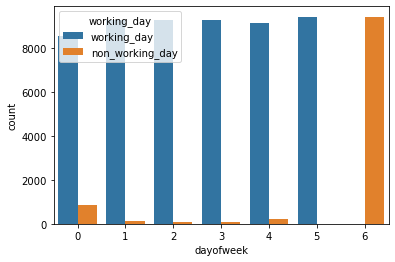

In [7]:
sns.countplot(data=demand, x='dayofweek', hue='working_day')

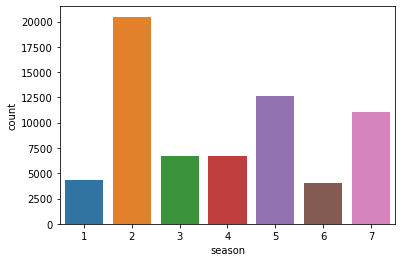

In [8]:
sns.countplot(data=demand, x='season')

## Machine Learning

In [9]:
import os.path
import sys
sys.path.append(os.path.join(os.path.dirname(os.path.realpath('__file__')), '../../..'))
ROOT_DIR = os.path.join(os.path.dirname(os.path.realpath('__file__')), '')

from run.market_forecasting_comparison.munging.multi_step_forecasting_wrangling import multi_step_data_prep, get_hours_of_days_needed
# from run.market_forecasting_comparison.ML.EstimatorSelectionHelper import EstimatorSelectionHelper

import numpy as np

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoLars
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import TimeSeriesSplit

In [11]:
models = {
    'LinearRegression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'ElasticNet': ElasticNet(),
    'llars': LassoLars(),
    'ExtraTreesRegressor': ExtraTreesRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'SVR': SVR(),
    "MLPRegressor": MLPRegressor(),
    'KNeighborsRegressor': KNeighborsRegressor()
}

params = {
    'LinearRegression': {},
    'Lasso': {},
    'Ridge': {},
    'ElasticNet': {},
    'llars': {},
    'ExtraTreesRegressor': {'model__estimator__n_estimators': [16, 32]},
    'RandomForestRegressor': {'model__estimator__n_estimators': [16, 32]},
    'AdaBoostRegressor':  {'model__estimator__n_estimators': [16, 32]},
    'GradientBoostingRegressor': {'model__estimator__n_estimators': [16, 32], 'model__estimator__learning_rate': [0.8, 1.0]},
    'SVR': [
        # {'model__estimator__kernel': ['linear'], 'model__estimator__C': [10]},
        {'model__estimator__kernel': ['rbf'], 'model__estimator__C': [1, 10], 'model__estimator__gamma': [0.001, 0.0001]},
    ],
    'MLPRegressor': {"model__estimator__hidden_layer_sizes": [(1,), (50,)], "model__estimator__activation": ["tanh", "relu"], "model__estimator__solver": ["adam"], "model__estimator__alpha": [0.00005, 0.0005]},
    'KNeighborsRegressor': {'model__estimator__n_neighbors': [5, 20, 50]},
}

In [12]:
class EstimatorSelectionHelper:

    def __init__(self, models, params):
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Some estimators are missing parameters: %s" % missing_params)
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv=5, n_jobs=8, verbose=1, refit=True, scoring=None):
        for key in self.keys:
            print("Running GridSearchCV for %s." % key)
            model = MultiOutputRegressor(self.models[key])
            
            pipeline = self.make_pipeline(model)
            params = self.params[key]
            tscv = TimeSeriesSplit(n_splits=cv)

            gs = GridSearchCV(pipeline, params, cv=tscv, n_jobs=n_jobs,
                              verbose=verbose, scoring=scoring, refit=refit,
                              return_train_score=True)
            gs.fit(X,y)
            self.grid_searches[key] = gs    

    def score_summary(self):
        all_results = []
        for k in self.grid_searches:
            results = pd.DataFrame(self.grid_searches[k].cv_results_)
            results['estimator'] = k
            all_results.append(results)
        results_df = pd.concat(all_results)
        results_df = results_df.loc[:,~results_df.columns.str.contains('train')] 

        return results_df
    
    def make_pipeline(self, model):
        steps = list()
        steps.append(('standardize', StandardScaler()))
        steps.append(('normalize', MinMaxScaler()))
        steps.append(('model', model))
        # create pipeline
        pipeline = Pipeline(steps=steps)
        return pipeline


In [13]:
def run_ml(dat):
    y = dat[dat.year<2017].filter(like='value').values
    final_year = dat[dat.year>2016].filter(regex='^(?!.*value).*$').values.astype(np.float32)
    print(len(final_year))
    
    X = dat[dat.year<2017].filter(regex='^(?!.*value).*$').values.astype(np.float32)

    helper1 = EstimatorSelectionHelper(models, params)
    # helper1.fit(X, y, n_jobs=-1, cv=5, refit=False)
    helper1.fit(X, y, scoring='neg_mean_absolute_error', n_jobs=-1, cv=8, refit=True, verbose=1)
    return helper1, final_year
#     res = helper1.score_summary()    

#     return res


In [14]:
demand = pd.read_csv('{}/../data/capacity/demand.csv'.format(ROOT_DIR))

demand = demand[demand.time < '2018']


prev_days_needed = get_hours_of_days_needed(days_wanted=[1, 2, 7, 30], hours_wanted=[28, 28, 28, 28, 28])
multi_step_dat = multi_step_data_prep(dat=demand, input_lags=prev_days_needed, outputs=24)
multi_step_dat.time = pd.to_datetime(multi_step_dat.time)
multi_step_dat['season'] = multi_step_dat.time.map(lambda x: get_season(x))

multi_step_dat['working_day'] = multi_step_dat.apply(lambda x: working_day_check(x), axis=1)

multi_step_dat = multi_step_dat.drop(columns=['time', 'Unnamed: 0'])

multi_step_dat


,value,hour,month,dayofweek,dayofmonth,year,holiday,value-1,value-2,value-3,...,n-740,n-741,n-742,n-743,n-744,n-745,n-746,n-747,season,working_day
770,34214.583333,21,7,1,5,2011,False,35869.833333,37017.666667,38274.583333,...,25302.750000,26183.750000,26950.916667,27883.666667,30041.916667,33132.083333,33181.000000,33880.250000,2,working_day
771,30264.500000,22,7,1,5,2011,False,34214.583333,35869.833333,37017.666667,...,24665.833333,25302.750000,26183.750000,26950.916667,27883.666667,30041.916667,33132.083333,33181.000000,2,working_day
772,28211.333333,23,7,1,5,2011,False,30264.500000,34214.583333,35869.833333,...,24041.250000,24665.833333,25302.750000,26183.750000,26950.916667,27883.666667,30041.916667,33132.083333,2,working_day
773,27015.750000,0,7,2,6,2011,False,28211.333333,30264.500000,34214.583333,...,25311.166667,24041.250000,24665.833333,25302.750000,26183.750000,26950.916667,27883.666667,30041.916667,2,working_day
774,26275.750000,1,7,2,6,2011,False,27015.750000,28211.333333,30264.500000,...,27123.500000,25311.166667,24041.250000,24665.833333,25302.750000,26183.750000,26950.916667,27883.666667,2,working_day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57294,35223.666667,19,12,6,31,2017,False,37531.583333,38381.416667,36561.083333,...,33061.833333,34133.916667,37765.500000,42847.250000,45969.416667,48157.916667,49271.000000,49574.833333,5,non_working_day
57295,32496.500000,20,12,6,31,2017,False,35223.666667,37531.583333,38381.416667,...,32920.250000,33061.833333,34133.916667,37765.500000,42847.250000,45969.416667,48157.916667,49271.000000,5,non_working_day
57296,29994.250000,21,12,6,31,2017,False,32496.500000,35223.666667,37531.583333,...,31417.583333,32920.250000,33061.833333,34133.916667,37765.500000,42847.250000,45969.416667,48157.916667,5,non_working_day
57297,27789.500000,22,12,6,31,2017,False,29994.250000,32496.500000,35223.666667,...,31130.750000,31417.583333,32920.250000,33061.833333,34133.916667,37765.500000,42847.250000,45969.416667,5,non_working_day


In [15]:
split_up_results = multi_step_dat.groupby(['season','working_day']).apply(run_ml)
split_up_results

ValueError: could not convert string to float: 'non_working_day'

In [16]:

scores = pd.concat([result.score_summary() for result, _ in split_up_results])
scores.groupby('estimator')['mean_test_score'].mean()

NameError: name 'split_up_results' is not defined

In [ ]:
scores.to_csv('/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/notebooks/data/offline_models_results.csv')

In [17]:
offline_results_long = pd.read_csv('/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/notebooks/data/offline_models_results_long.csv')
offline_results_long['mean_test_score'] = -offline_results_long.mean_test_score
offline_results_long

,Unnamed: 0,X,estimator,mean_fit_time,mean_score_time,mean_test_score,param_model__estimator__C,param_model__estimator__activation,param_model__estimator__alpha,param_model__estimator__gamma,...,param_model__estimator__n_neighbors,param_model__estimator__solver,params,rank_test_score,std_fit_time,std_score_time,std_test_score,time,val,id
0,1.1,0,LinearRegression,0.485895,0.003404,3.587598e+03,NaN,NaN,NaN,NaN,...,NaN,NaN,{},1,0.165286,0.000226,2.274701e+03,1,-5.951833e+03,1
1,2.1,0,Lasso,0.210076,0.003172,3.191480e+03,NaN,NaN,NaN,NaN,...,NaN,NaN,{},1,0.060515,0.000580,1.937868e+03,1,-6.565345e+03,2
2,3.1,0,Ridge,0.052053,0.003837,2.336506e+03,NaN,NaN,NaN,NaN,...,NaN,NaN,{},1,0.008397,0.000406,9.091514e+02,1,-3.897130e+03,3
3,4.1,0,ElasticNet,0.031507,0.003446,2.428554e+03,NaN,NaN,NaN,NaN,...,NaN,NaN,{},1,0.004769,0.000523,3.341867e+02,1,-2.330095e+03,4
4,5.1,0,llars,0.529994,0.003413,1.494501e+06,NaN,NaN,NaN,NaN,...,NaN,NaN,{},1,0.089943,0.000518,3.947967e+06,1,-1.193984e+07,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3355,416.8,6,MLPRegressor,112.297074,0.023604,3.841286e+04,NaN,relu,0.0005,NaN,...,NaN,adam,"{'model__estimator__activation': 'relu', 'mode...",4,56.559232,0.002622,2.278844e+03,8,-3.550091e+04,416
3356,417.8,7,MLPRegressor,187.536028,0.041225,2.111087e+04,NaN,relu,0.0005,NaN,...,NaN,adam,"{'model__estimator__activation': 'relu', 'mode...",2,58.092206,0.023243,1.116450e+04,8,-5.823098e+03,417
3357,418.8,0,KNeighborsRegressor,0.463426,18.436250,2.597865e+03,NaN,NaN,NaN,NaN,...,5.0,NaN,{'model__estimator__n_neighbors': 5},1,0.269698,9.223486,8.001508e+02,8,-1.956452e+03,418
3358,419.8,1,KNeighborsRegressor,0.443546,24.140480,2.651798e+03,NaN,NaN,NaN,NaN,...,20.0,NaN,{'model__estimator__n_neighbors': 20},2,0.239989,12.305134,6.573882e+02,8,-1.951467e+03,419


In [18]:
model_names = {"LinearRegression": "Linear Regression", "llars": "LARS", "ExtraTreesRegressor": "Extra Trees", "AdaBoostRegressor":"AdaBoost", "RandomForestRegressor": "Random Forest", "GradientBoostingRegressor":"Gradient Boosting", "MLPRegressor": "MLP", "KNeighborsRegressor": "K-Neighbors"}
offline_results_long.replace(model_names, inplace=True)
offline_results_long

,Unnamed: 0,X,estimator,mean_fit_time,mean_score_time,mean_test_score,param_model__estimator__C,param_model__estimator__activation,param_model__estimator__alpha,param_model__estimator__gamma,...,param_model__estimator__n_neighbors,param_model__estimator__solver,params,rank_test_score,std_fit_time,std_score_time,std_test_score,time,val,id
0,1.1,0,Linear Regression,0.485895,0.003404,3.587598e+03,NaN,NaN,NaN,NaN,...,NaN,NaN,{},1,0.165286,0.000226,2.274701e+03,1,-5.951833e+03,1
1,2.1,0,Lasso,0.210076,0.003172,3.191480e+03,NaN,NaN,NaN,NaN,...,NaN,NaN,{},1,0.060515,0.000580,1.937868e+03,1,-6.565345e+03,2
2,3.1,0,Ridge,0.052053,0.003837,2.336506e+03,NaN,NaN,NaN,NaN,...,NaN,NaN,{},1,0.008397,0.000406,9.091514e+02,1,-3.897130e+03,3
3,4.1,0,ElasticNet,0.031507,0.003446,2.428554e+03,NaN,NaN,NaN,NaN,...,NaN,NaN,{},1,0.004769,0.000523,3.341867e+02,1,-2.330095e+03,4
4,5.1,0,LARS,0.529994,0.003413,1.494501e+06,NaN,NaN,NaN,NaN,...,NaN,NaN,{},1,0.089943,0.000518,3.947967e+06,1,-1.193984e+07,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3355,416.8,6,MLP,112.297074,0.023604,3.841286e+04,NaN,relu,0.0005,NaN,...,NaN,adam,"{'model__estimator__activation': 'relu', 'mode...",4,56.559232,0.002622,2.278844e+03,8,-3.550091e+04,416
3356,417.8,7,MLP,187.536028,0.041225,2.111087e+04,NaN,relu,0.0005,NaN,...,NaN,adam,"{'model__estimator__activation': 'relu', 'mode...",2,58.092206,0.023243,1.116450e+04,8,-5.823098e+03,417
3357,418.8,0,K-Neighbors,0.463426,18.436250,2.597865e+03,NaN,NaN,NaN,NaN,...,5.0,NaN,{'model__estimator__n_neighbors': 5},1,0.269698,9.223486,8.001508e+02,8,-1.956452e+03,418
3358,419.8,1,K-Neighbors,0.443546,24.140480,2.651798e+03,NaN,NaN,NaN,NaN,...,20.0,NaN,{'model__estimator__n_neighbors': 20},2,0.239989,12.305134,6.573882e+02,8,-1.951467e+03,419


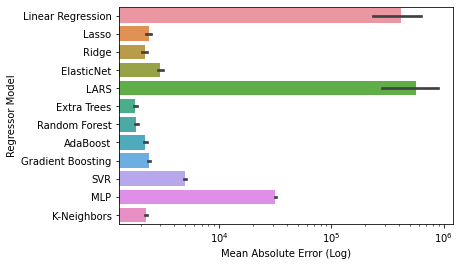

In [19]:
g = sns.barplot(data=offline_results_long, y='estimator', x='mean_test_score')
g.set_xscale("log")
plt.xlabel("Mean Absolute Error (Log)")
plt.ylabel("Regressor Model")
plt.savefig('/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/notebooks/figures/offline_model_mae.eps', dpi=1000, bbox_inches='tight')

In [22]:
offline_results_long[offline_results_long.estimator=="Extra Trees"].mean()

Unnamed: 0                                     201.950000
X                                                0.500000
mean_fit_time                                   30.525551
mean_score_time                                  0.085272
mean_test_score                               1790.249721
param_model__estimator__C                             NaN
param_model__estimator__activation                    NaN
param_model__estimator__alpha                         NaN
param_model__estimator__gamma                         NaN
param_model__estimator__hidden_layer_sizes            NaN
param_model__estimator__kernel                        NaN
param_model__estimator__learning_rate                 NaN
param_model__estimator__n_estimators            24.000000
param_model__estimator__n_neighbors                   NaN
param_model__estimator__solver                        NaN
rank_test_score                                  1.500000
std_fit_time                                    13.072907
std_score_time

In [ ]:
def predict_next_day(model, data):
    results = model.predict(data)
    return results


def get_differences_df(dat, name, model):
    helper1 = dat.iloc[0,0][0]
    X = multi_step_dat[(multi_step_dat.year==2017) & (multi_step_dat.season==name[0]) & (multi_step_dat.working_day==name[1])].filter(regex='^(?!.*value|working|season).*$').values.astype(np.float32)
    actuals = multi_step_dat[(multi_step_dat.year==2017) & (multi_step_dat.season==name[0]) & (multi_step_dat.working_day==name[1])].filter(like='value').values
    
    model = helper1.grid_searches[model].best_estimator_

    all_differences_list = []
    for day in range(math.ceil(len(X)/24)):

        entire_data = X[day].reshape(1,-1)
        predicted = predict_next_day(model, entire_data)[0]

        actual = actuals[day]#.reshape(1,-1)

        differences = predicted - actual
        all_differences_list.append(differences)
        plotting_data = pd.DataFrame({"actual":actual, "predicted":predicted, 'hour':range(24)}).melt(id_vars="hour", value_vars=['actual','predicted'])
#         sns.lineplot(data=plotting_data, x='hour', y='value', hue='variable')
#         plt.show()

    flattened_differences = np.concatenate(all_differences_list, axis=0)

    differences_dataframe = pd.DataFrame({'differences':flattened_differences})
    return differences_dataframe
# sns.distplot(differences_dataframe.differences)

In [ ]:
differences = split_up_results.to_frame().groupby(['season','working_day']).apply(lambda x: get_differences_df(x, x.name, 'ExtraTreesRegressor'))
differences

In [ ]:
# type(differences)
# pd.concat(differences)
# dat = []
# for i in differences:
#     dat.append(i)

# multi_differences = pd.concat(dat)
plt.rcParams.update({'font.size': 15})
sns.set_color_codes()
multi_differences = differences
sns.distplot(multi_differences.differences, color="lightblue")
fig = plt.figure(1)
ax = fig.add_subplot(111)
plt.axvline(x=multi_differences.differences.quantile(0.05), linestyle='--', linewidth=2.5, label="5% Percentile", c='orange')
plt.axvline(x=multi_differences.differences.quantile(0.95), linestyle='--', linewidth=2.5, label="95% Percentile", c='purple')
plt.ylabel("Frequency of occurence", labelpad=14)
plt.axvline(x=0, label="0", c='g')
plt.axvline(x=-6000, label="Max Tendered National Grid Reserve", c='r')
plt.axvline(x=6000, label="_Max Tendered National Grid Reserve", c='r')
plt.axvline(x=-2000, label="Average Available Tendered National Grid Reserve", c='blue')
plt.axvline(x=2000, label="_Average Available Tendered National Grid Reserve", c='blue')
plt.xlabel("Residuals")

# lgd = ax.legend(bbox_to_anchor=(1.05, 1.17));
lgd = ax.legend(bbox_to_anchor=(1.05, -0.17));

plt.savefig('/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/notebooks/figures/ExtraTreesRegressor_distribution_plot.eps', dpi=1000, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig('/Users/alexanderkell/Documents/PhD/Papers/7-day-ahead-forecasting-comparison/elsarticle/figures/results/ExtraTreesRegressor_distribution_plot.eps', dpi=1000, bbox_extra_artists=(lgd,), bbox_inches='tight')

multi_differences.to_csv('/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/results/results/ExtraTreesRegressor_distribution.csv')


In [ ]:
one_model = pd.read_csv('/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/results/prediction_errors/one_model.csv')
one_model

In [ ]:
# multi_differences
# one_model

dat = pd.DataFrame({"multi_model_diff":multi_differences.reset_index(drop=True).differences, "single_model_diff": one_model.iloc[:8376].reset_index(drop=True).differences})


In [ ]:
sns.distplot(multi_differences["differences"] , color="skyblue", label="Multiple Models")
    sns.distplot(one_model["differences"] , color="red", label="Single Model")
plt.legend()


In [ ]:
np.mean(multi_differences.differences.abs())

In [ ]:
plt.rcParams.update({'font.size': 15})
sns.set_color_codes()
multi_differences = differences
sns.distplot(multi_differences["differences"] , color="skyblue", label="Multiple Models")
sns.distplot(one_model["differences"] , color="red", label="Single Model")
fig = plt.figure(1)
ax = fig.add_subplot(111)
plt.axvline(x=multi_differences.differences.quantile(0.05), linestyle='--', linewidth=2.5, label="5% Percentile", c='orange')
plt.axvline(x=multi_differences.differences.quantile(0.95), linestyle='--', linewidth=2.5, label="95% Percentile", c='purple')
plt.ylabel("Frequency of occurence", labelpad=14)
plt.axvline(x=0, label="0", c='g')
plt.axvline(x=-6000, label="Max Tendered National Grid Reserve", c='r')
plt.axvline(x=6000, label="Max Tendered National Grid Reserve", c='r')
plt.axvline(x=-2000, label="Average Available Tendered National Grid Reserve", c='blue')
plt.axvline(x=2000, label="Average Available Tendered National Grid Reserve", c='blue')
plt.xlabel("Residuals")

# lgd = ax.legend(bbox_to_anchor=(1.05, 1.17));
lgd = ax.legend(bbox_to_anchor=(1.05, -0.17));

plt.savefig('/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/notebooks/figures/ExtraTreesRegressor_distribution_plot.eps', dpi=1000, bbox_extra_artists=(lgd,), bbox_inches='tight')
